# Quantity

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/chaoming0625/brainunit/blob/master/docs/physical_units/quantity.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/chaoming0625/brainunit/blob/master/docs/physical_units/quantity.ipynb)

Brainunit generates standard names for units, combining the unit name (e.g. “siemens”) with a prefixes (e.g. “m”), and also generates squared and cubed versions by appending a number. For example, the units “msiemens”, “siemens2”, “usiemens3” are all predefined. You can import these units from the package `brianunit` – accordingly, an `from brainunit import *` will result in everything being imported.

We recommend importing only the units you need, to have a cleaner namespace. For example, `import brainunit as u` and then using `u.msiemens` instead of `msiemens`.

In [74]:
import brainunit as u

In the underlying design, Quantity consists of two attributes (mantissa and unit), and the specific value it represents is calculated by the formula below:

$$
\mathrm{value} = \mathrm{mantissa} \times \mathrm{unit.base} ^ \mathrm{unit.scale} * \text{dimension}, 
$$

where `unit.base` is the base for this unit (as the base of the exponent) and `unit.scale` is the scale for this unit (as the integer exponent of base)


A quantity is equivalent to the scientific notation of 

$$
\mathrm{mantissa} \times \mathrm{base}^\mathrm{scale}
$$

For example, ``5 * ms`` is equivalent to ``5 * 10^-3 * s = 5 * 0.001 * s = 0.005 * s``.   


You can generate a physical quantity by multiplying a scalar or ndarray with its physical unit:

In [75]:
tau = 20 * u.ms
tau

20 * msecond

In [76]:
rates = [10, 20, 30] * u.Hz
rates

ArrayImpl([10, 20, 30]) * hertz

In [77]:
rates = [[10, 20, 30], [20, 30, 40]] * u.Hz
rates

ArrayImpl([[10, 20, 30],
           [20, 30, 40]]) * hertz

Brainunit will check the consistency of operations on units and raise an error for dimensionality mismatches:

In [78]:
try:
    tau += 1  # ms? second?
except Exception as e:
    print(e)

Cannot calculate ... += 1, units do not match (units are ms and Unit(10.0^0)).


In [79]:
try:
    3 * u.kgram + 3 * u.amp
except Exception as e:
    print(e)

Cannot calculate 3 + 3, units do not match (units are kg and A).


## Creating Quantity Instances

Creating a Quantity object can be accomplished in several ways, categorized based on the type of input used. Here, we present the methods grouped by their input types and characteristics for better clarity.

In [80]:
import jax.numpy as jnp

### Scalar and Array Multiplication
- Multiplying a Scalar with a Unit

In [81]:
5 * u.ms

5 * msecond

- Multiplying a Jax nunmpy value type with a Unit:

In [82]:
jnp.float64(5) * u.ms

C:\Users\adadu\miniconda3\envs\brainpy\Lib\site-packages\jax\_src\numpy\lax_numpy.py:195: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)


5. * msecond

- Multiplying a Jax numpy array with a Unit:

In [83]:
jnp.array([1, 2, 3]) * u.ms

ArrayImpl([1, 2, 3]) * msecond

- Multiplying a List with a Unit:

In [84]:
[1, 2, 3] * u.ms

ArrayImpl([1, 2, 3]) * msecond

### Direct Quantity Creation

- Creating a Quantity Directly with a Value

In [85]:
u.Quantity(5)

Quantity(5)

- Creating a Quantity Directly with a Value and Unit

In [86]:
u.Quantity(5, unit=u.ms)

5 * msecond

- Creating a Quantity with a Jax numpy Array of Values and a Unit

In [87]:
u.Quantity(jnp.array([1, 2, 3]), unit=u.ms)

ArrayImpl([1, 2, 3]) * msecond

- Creating a Quantity with a List of Values and a Unit

In [88]:
u.Quantity([1, 2, 3], unit=u.ms)

ArrayImpl([1, 2, 3]) * msecond

- Creating a Quantity with a List of Quantities

In [89]:
u.Quantity([500 * u.ms, 1 * u.second])

ArrayImpl([ 500., 1000.], dtype=float32) * msecond

- Using the with_units Method

In [90]:
u.Quantity.with_unit(jnp.array([0.5, 1]), unit=u.second)

ArrayImpl([0.5, 1. ], dtype=float32) * second

### Unitless Quantity
Quantities can be unitless, which means they have no units. If there is no unit provided, the quantity is assumed to be unitless. The following are examples of creating unitless quantities:

In [91]:
u.Quantity([1, 2, 3])

Quantity(ArrayImpl([1, 2, 3]))

In [92]:
u.Quantity(jnp.array([1, 2, 3]))

Quantity(ArrayImpl([1, 2, 3]))

In [93]:
u.Quantity([])

Quantity(ArrayImpl([], dtype=float32))

### Illegal Quantity Creation
The following are examples of illegal quantity creation:

In [94]:
try:
    u.Quantity([500 * u.ms, 1])
except Exception as e:
    print(e)

All elements must have the same units, but got [msecond, None]


In [95]:
try:
    u.Quantity(["some", "nonsense"])
except Exception as e:
    print(e)

Value 'some' with dtype <U4 is not a valid JAX array type. Only arrays of numeric types are supported by JAX.


In [96]:
try:
    u.Quantity([500 * u.ms, 1 * u.volt])
except Exception as e:
    print(e)

All elements must have the same units, but got [msecond, volt]


### Creating Functions
You can create functions that return quantities. The following are examples of creating functions that return quantities:

#### `brainunit.math.array` & `brainunit.math.asarray`
Convert the input to a quantity or array.

  If unit is provided, the input will be checked whether it has the same unit as the provided unit.
  (If they have same unit but different scale, the input will be converted to the provided unit.)
  If unit is not provided, the input will be converted to an array.


In [97]:
u.math.asarray([1, 2, 3])                       # return a jax.Array

Array([1, 2, 3], dtype=int32)

In [98]:
# check if the input has the same unit as the provided unit
u.math.asarray([1, 2, 3] * u.second, unit=u.second)    # return a Quantity

ArrayImpl([1, 2, 3]) * second

In [99]:
# Same unit, but different scale
u.math.asarray([1, 2, 3] * u.msecond, unit=u.second)    # return a Quantity

ArrayImpl([0.001, 0.002, 0.003], dtype=float32) * second

In [100]:
# fails because the input has a different unit
try:
    u.math.asarray([1 * u.second, 2 * u.second], unit=u.ampere)
except Exception as e:
    print(e)

Cannot convert to a unit with different dimensions. (units are s and A).


#### More Functions
Other functions that can be used to create quantities are:
- `brainunit.math.arange`
- `brainunit.math.array_spilt`
- `brainunit.math.linespace`
- `brainunit.math.logspace`
- `brainunit.math.meshgrid`
- `brainunit.math.vandermode`
- Can use with Quantity
  - `brainunit.math.full`
  - `brainunit.math.empty`
  - `brainunit.math.ones`
  - `brainunit.math.zeros`
  - `brainunit.math.full_like`
  - `brainunit.math.empty_like`
  - `brainunit.math.ones_like`
  - `brainunit.math.zeros_like`
  - `brainunit.math.fill_diagonal`
- Can use with unit keyword
  - `brainunit.math.eye`
  - `brainunit.math.identity`
  - `brainunit.math.tri`
  - `brainunit.math.diag`
  - `brainunit.math.tril`
  - `brainunit.math.triu`

See the [Array Creation Documentation](https://brainunit.readthedocs.io/en/latest/mathematical_functions/array_creation.html) for more information.

## Converting to Different Units

You can convert a quantity to a different unit using the `to_decimal` method. The following are examples of converting quantities to different units:

In [101]:
q = (1, 2, 3) * u.second
q

ArrayImpl([1, 2, 3]) * second

In [102]:
q.to_decimal(u.msecond)

Array([1000., 2000., 3000.], dtype=float32, weak_type=True)

Brainunit will check the consistency of operations on units and raise an error for dimensionality mismatches:

In [103]:
try:
    q.to_decimal(u.ampere)
except Exception as e:
    print(e)

Cannot convert to the decimal number using a unit with different dimensions. The quantity has the unit s, but the given unit is A


## Attributes of a Quantity

The important attributes of a `Quantity` object are:
- `mantissa`: the mantissa of the quantity
- `unit`: the unit of the quantity
- `dim`: the dimension of the unit of the quantity
- `ndim`: the number of dimensions of quantity's value
- `shape`: the shape of the quantity's value
- `size`: the size of the quantity's value
- `dtype`: the dtype of the quantity's value

### An example

In [104]:
rates = [[10., 20., 30.], [20., 30., 40.]] * u.Hz
rates

ArrayImpl([[10., 20., 30.],
           [20., 30., 40.]], dtype=float32) * hertz

In [105]:
rates.mantissa

Array([[10., 20., 30.],
       [20., 30., 40.]], dtype=float32)

In [106]:
rates.dim

second ** -1

In [107]:
rates.ndim, rates.shape, rates.size, rates.dtype

(2, (2, 3), 6, dtype('float32'))

## Arithmetic Functions

Like Numpy and Jax numpy, arithmetic operators on arrays apply elementwise.

In [108]:
a = [20, 30, 40, 50] * u.mV
b = jnp.arange(4) * u.mV
b

ArrayImpl([0, 1, 2, 3]) * mvolt

### Addition and Subtraction

Addition and subtraction of quantities need to have the same units and keep the units in the result.

In [109]:
c = a - b
c

ArrayImpl([20, 29, 38, 47]) * mvolt

In [110]:
c + b

ArrayImpl([20, 30, 40, 50]) * mvolt

### Multiplication and Division

Multiplication and division of quantities multiply and divide the values and add and subtract the dimensions of the units.

In [111]:
A = jnp.array([[1, 2], [3, 4]]) * u.mV
B = jnp.array([[5, 6], [7, 8]]) * u.mV

A, B

(ArrayImpl([[1, 2],
            [3, 4]]) * mvolt,
 ArrayImpl([[5, 6],
            [7, 8]]) * mvolt)

In [112]:
A * B # element-wise multiplication

ArrayImpl([[ 5, 12],
           [21, 32]]) * mvolt2

In [113]:
A @ B # matrix multiplication

ArrayImpl([[19, 22],
           [43, 50]]) * mvolt2

In [114]:
A.dot(B) # matrix multiplication

ArrayImpl([[19, 22],
           [43, 50]]) * mvolt2

In [115]:
A / 2 # divide by a scalar

ArrayImpl([[0.5, 1. ],
           [1.5, 2. ]], dtype=float32) * mvolt

if the unit of result is unitless, the unit is removed and returned as jax.Array

In [116]:
A / (2 * u.mV) # divide by a quantity, return jax array

Array([[0.5, 1. ],
       [1.5, 2. ]], dtype=float32)

In [117]:
A / (2 * u.mA) # divide by a quantity, return quantity

ArrayImpl([[0.5, 1. ],
           [1.5, 2. ]], dtype=float32) * ohm

### Power

The power operator raises the value of the quantity to the power of the scalar, and multiplies the unit by the scalar.

In [118]:
A

ArrayImpl([[1, 2],
           [3, 4]]) * mvolt

In [119]:
A ** 2 # element-wise power

ArrayImpl([[ 1,  4],
           [ 9, 16]]) * mvolt2

## Built-in Functions

Brainunit provides a number of built-in functions in `Quantity` class to perform operations on quantities. These functions are:
- unary operations
    - positive(+)
    - negative(-)
    - absolute(abs)
    - invert(~)
- logical operations
    - all
    - any
- shape operations
    - reshape
    - resize
    - squeeze
    - unsqueeze
    - spilt
    - swapaxes
    - transpose
    - ravel
    - take
    - repeat
    - diagonal
    - trace
- mathematical functions
    - nonzero
    - argmax
    - argmin
    - argsort
    - var
    - round
    - std
    - sum
    - cumsum
    - cumprod
    - max
    - mean
    - min
    - ptp
    - clip
    - conj
    - dot
    - fill
    - item
    - prod
    - clamp
    - sort

For more details on these functions, refer to the [documentation](https://braincore.readthedocs.io/en/latest/braincore/apis/generated/brainunit.Quantity.html).

## Indexing, Slicing and Iterating

One-dimensional Quantity can be indexed, sliced and iterated over, much like lists and other Python sequences.

In [120]:
a = jnp.arange(10) ** 3 * u.mV
a

ArrayImpl([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729]) * mvolt

In [121]:
a[2]

8 * mvolt

In [122]:
a[2:5]

ArrayImpl([ 8, 27, 64]) * mvolt

Only same dimension Quantity can be set to a slice of a Quantity.

In [123]:
# equivalent to a[0:6:2] = 1000;
# from start to position 6, exclusive, set every 2nd element to 1000
a[:6:2] = 1000 * u.mV
a

ArrayImpl([1000,    1, 1000,   27, 1000,  125,  216,  343,  512,  729]) * mvolt

In [124]:
a[::-1] # reversed a

ArrayImpl([ 729,  512,  343,  216,  125, 1000,   27, 1000,    1, 1000]) * mvolt

In [125]:
for i in a:
    print(i**(1 / 3.))

10.00000095 * mvolt ** 0.3333333333333333
1. * mvolt ** 0.3333333333333333
10.00000095 * mvolt ** 0.3333333333333333
3. * mvolt ** 0.3333333333333333
10.00000095 * mvolt ** 0.3333333333333333
5.00000048 * mvolt ** 0.3333333333333333
6.00000048 * mvolt ** 0.3333333333333333
7.00000048 * mvolt ** 0.3333333333333333
8.00000095 * mvolt ** 0.3333333333333333
9.00000095 * mvolt ** 0.3333333333333333


Multidimensional Quantity can have one index per axis. These indices are given in a tuple separated by commas:

In [126]:
def f(x, y):
    return 10 * x + y
b = jnp.fromfunction(f, (5, 4), dtype=jnp.int32) * u.mV
b

ArrayImpl([[ 0,  1,  2,  3],
           [10, 11, 12, 13],
           [20, 21, 22, 23],
           [30, 31, 32, 33],
           [40, 41, 42, 43]]) * mvolt

In [127]:
b[2, 3]

23 * mvolt

In [128]:
b[0:5, 1]  # each row in the second column of b

ArrayImpl([ 1, 11, 21, 31, 41]) * mvolt

In [129]:
b[:, 1]  # equivalent to the previous example

ArrayImpl([ 1, 11, 21, 31, 41]) * mvolt

In [130]:
b[1:3, :]  # each column in the second and third row of b

ArrayImpl([[10, 11, 12, 13],
           [20, 21, 22, 23]]) * mvolt

When fewer indices are provided than the number of axes, the missing indices are considered complete slices:

In [131]:
b[-1]

ArrayImpl([40, 41, 42, 43]) * mvolt

The expression within brackets in b[i] is treated as an i followed by as many instances of : as needed to represent the remaining axes. NumPy also allows you to write this using dots as b[i, ...].

The dots (...) represent as many colons as needed to produce a complete indexing tuple. For example, if x is a Quantity with 5 axes, then
- x[1, 2, ...] is equivalent to x[1, 2, :, :, :],
- x[..., 3] to x[:, :, :, :, 3] and
- x[4, ..., 5, :] to x[4, :, :, 5, :].

In [132]:
c = jnp.array([[[0, 1, 2], [10, 12, 13]], [[100, 101, 102], [110, 112, 113]]]) * u.mV # a 3D array (two stacked 2D arrays)
c.shape

(2, 2, 3)

In [133]:
c[1, ...] # same as c[1, :, :] or c[1]

ArrayImpl([[100, 101, 102],
           [110, 112, 113]]) * mvolt

In [134]:
c[..., 2] # same as c[:, :, 2]

ArrayImpl([[  2,  13],
           [102, 113]]) * mvolt

Iterating over multidimensional Quantity is done with respect to the first axis:

In [135]:
for row in b:
    print(row)

ArrayImpl([0, 1, 2, 3]) * mvolt
ArrayImpl([10, 11, 12, 13]) * mvolt
ArrayImpl([20, 21, 22, 23]) * mvolt
ArrayImpl([30, 31, 32, 33]) * mvolt
ArrayImpl([40, 41, 42, 43]) * mvolt


## Operating on Subsets

`.at` method can be used to operate on a subset of the Quantity. The following are examples of operating on subsets of a Quantity:

In [136]:
q = jnp.arange(5.0) * u.mV
q

ArrayImpl([0., 1., 2., 3., 4.], dtype=float32) * mvolt

In [137]:
q.at[2].add(10 * u.mV)

ArrayImpl([ 0.,  1., 12.,  3.,  4.], dtype=float32) * mvolt

In [138]:
q.at[10].add(10 * u.mV)  # out-of-bounds indices are ignored

ArrayImpl([0., 1., 2., 3., 4.], dtype=float32) * mvolt

In [139]:
q.at[20].add(10 * u.mV, mode='clip') # out-of-bounds indices are clipped

ArrayImpl([ 0.,  1.,  2.,  3., 14.], dtype=float32) * mvolt

In [140]:
q.at[2].get()

2. * mvolt

In [141]:
q.at[20].get()  # out-of-bounds indices clipped

4. * mvolt

In [142]:
q.at[20].get(mode='fill')  # out-of-bounds indices filled with NaN

nan * mvolt

Brainunit will check the consistency of operations on units and raise an error for dimensionality mismatches:

In [143]:
try:
    q.at[2].add(10)
except Exception as e:
    print(e)

Cannot convert to a unit with different dimensions. (units are Unit(10.0^0) and mV).


Brainunit also allows customized fill values for the `at` method:

In [144]:
q.at[20].get(mode='fill', fill_value=-1 * u.mV)  # custom fill value

-1. * mvolt

In [145]:
try:
    q.at[20].get(mode='fill', fill_value=-1)
except Exception as e:
    print(e)

Cannot convert to a unit with different dimensions. (units are Unit(10.0^0) and mV).


## Plotting Quantities

`Quantity` objects can be conveniently plotted using [Matplotlib](https://matplotlib.org/). This feature will be turned on automatically if Matplotlib is installed. The following are examples of plotting quantities:

Then `Quantity` objects can be passed to matplotlib plotting functions. The axis labels are automatically labeled with the unit of the quantity:


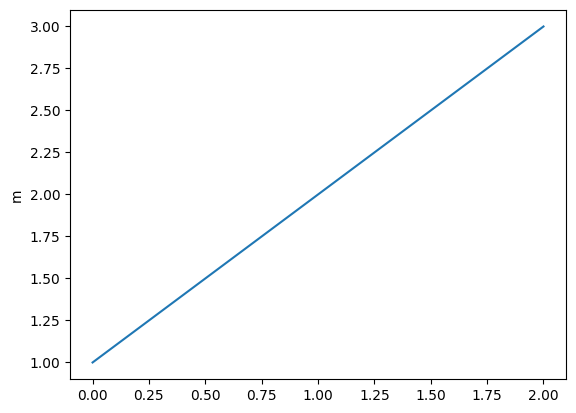

In [1]:
import brainunit as bu

from matplotlib import pyplot as plt

plt.figure()
plt.plot([1, 2, 3] * bu.meter)

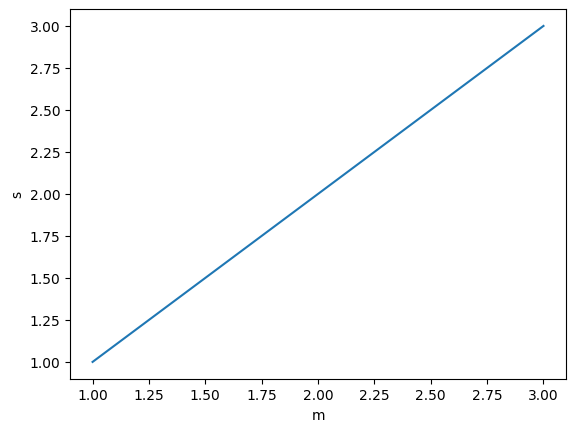

In [2]:
plt.plot([1, 2, 3] * bu.meter, [1, 2, 3] * bu.second)

Brainunit also supports plotting different scales of quantities with same unit on the same axis:

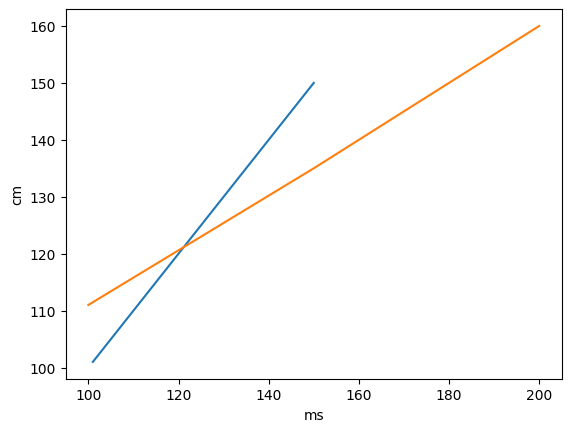

In [3]:
plt.plot([101, 125, 150] * bu.ms, [101, 125, 150] * bu.cmeter)
plt.plot([0.1, 0.15, 0.2] * bu.second, [111, 135, 160] * bu.cmeter)

It is not allowed to plot quantities with different units on the same axis:

Failed to convert value(s) to axis units: ArrayImpl([131, 155, 180]) * mamp


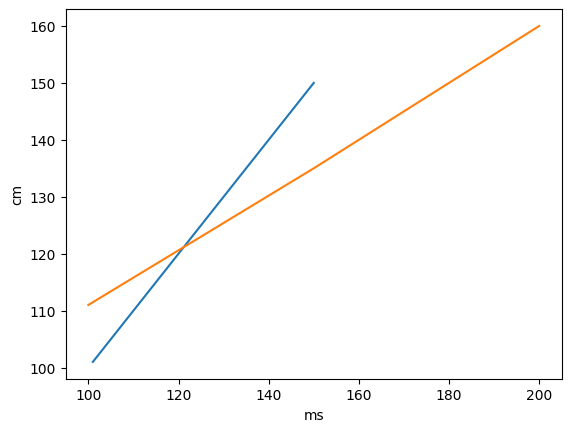

In [4]:
try:
    plt.plot([101, 125, 150] * bu.ms, [101, 125, 150] * bu.cmeter)
    plt.plot([0.1, 0.15, 0.2] * bu.second, [111, 135, 160] * bu.cmeter)
    plt.plot([0.1, 0.15, 0.2] * bu.second, [131, 155, 180] * bu.mA)
except Exception as e:
    print(e)
